In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
data = pd.read_csv("Mobile phone price.csv")
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [5]:
data.dtypes

Brand                     object
Model                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Camera (MP)               object
Battery Capacity (mAh)     int64
Price ($)                 object
dtype: object

In [6]:
#Removing extra spaces in column names
data.columns = data.columns.str.strip() # method to each column label, removing any leading or trailing whitespace from each label.
data.columns = data.columns.str.replace(" ","")
data.rename(columns={'Price($)': 'Price',
                     'ScreenSize(inches)': 'ScreenSize',
                     'Camera(MP)': 'Camera',
                     'BatteryCapacity(mAh)': 'BetteryCapacity',
                     'Price($)': 'Price'}, inplace=True)
print(data.columns)

Index(['Brand', 'Model', 'Storage', 'RAM', 'ScreenSize', 'Camera',
       'BetteryCapacity', 'Price'],
      dtype='object')


In [7]:
#RAM, Storage, Price, ScreenSize to numeric dtype


# findall() -  used to extract numbers from a string.

data["Storage"] = [int(re.findall(r'\d+', value)[0]) for value in data["Storage"].values]

data["RAM"] = [int(re.findall(r'\d+', value)[0]) for value in data["RAM"].values]

data["Price"] = [int(re.findall(r'\d+,*\d*', value)[0].replace(',', '')) for value in data["Price"].values]

data["ScreenSize"] = [float(re.findall(r'\d+\.*\d*', value)[0]) for value in data["ScreenSize"].values]

data.head()

,Brand,Model,Storage,RAM,ScreenSize,Camera,BetteryCapacity,Price
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799


In [8]:
data["Brand"].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Xiaomi', 'Google', 'Oppo', 'Vivo',
       'Realme', 'Motorola', 'Nokia', 'Sony', 'LG', 'Asus', 'Blackberry',
       'CAT', 'Huawei'], dtype=object)

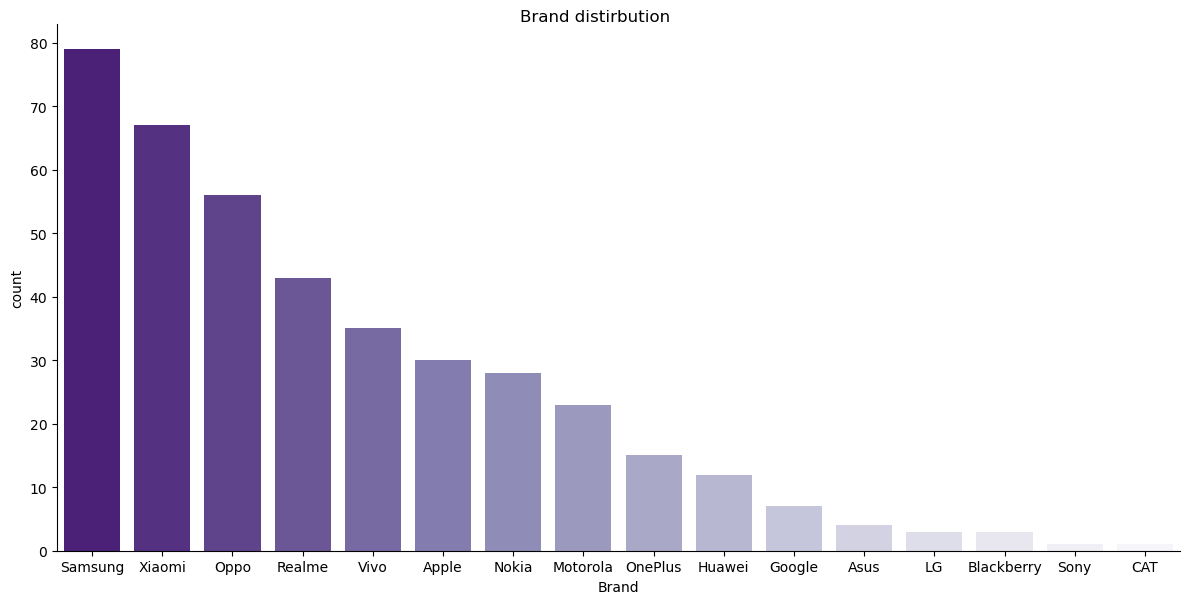

In [9]:
g = sns.catplot(x="Brand",data=data,kind="count",palette="Purples_r", height=6, aspect=2,order = data['Brand'].value_counts().index)
g.fig.suptitle("Brand distirbution",y=1)
plt.show()

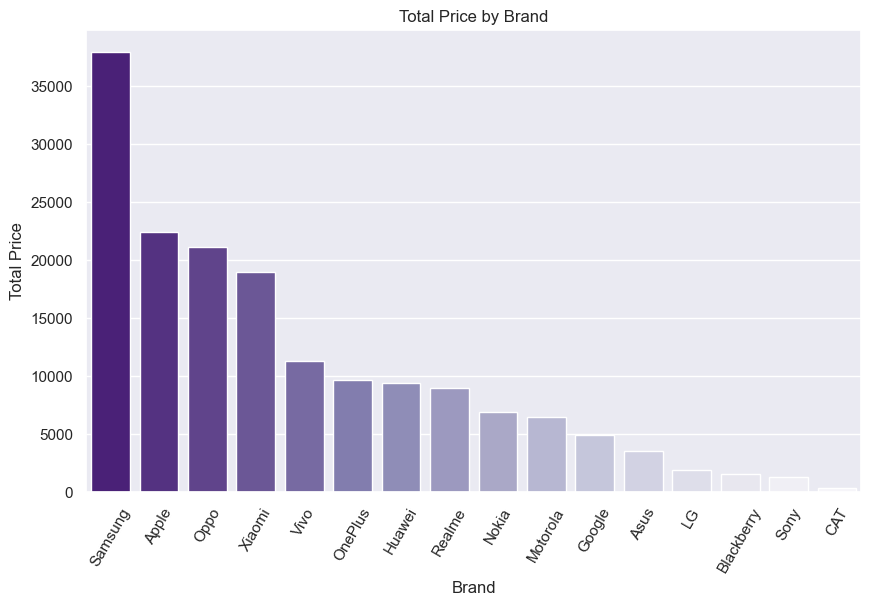

In [10]:
brand_prices = data.groupby('Brand')['Price'].sum().reset_index()
brand_prices_sorted = brand_prices.sort_values(by='Price', ascending=False)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_prices_sorted, x='Brand', y='Price', palette="Purples_r" )

plt.title("Total Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Total Price")
plt.xticks(rotation=60, ha='center')
plt.show()

In [11]:
data["Model"].value_counts()

Poco X3 Pro           6
Y33s                  5
iPhone XR             5
C21Y                  5
Redmi 10 Prime        5
                     ..
Mi 11 Lite NE         1
Moto G Stylus 2021    1
A54s 5G               1
Galaxy M52            1
Reno3                 1
Name: Model, Length: 239, dtype: int64

In [12]:
data["Model"].unique()

array(['iPhone 13 Pro', 'Galaxy S21 Ultra', '9 Pro', 'Redmi Note 10 Pro',
       'Pixel 6', 'iPhone 13', 'Galaxy Z Flip3', 'Poco X3 Pro',
       'Reno6 Pro+ 5G', 'X70 Pro+', 'Nord CE 5G', 'Galaxy A52s 5G',
       'GT Neo2', 'iPhone 12 Mini', 'Find X3 Pro', 'Mi 11 Lite 5G NE',
       'Galaxy S21', 'Y20s (G)', '8s 5G', 'A94', 'Redmi 10 Prime',
       'Galaxy A22 5G', 'Narzo 50 Pro 5G', '9', 'Redmi Note 10 Pro Max',
       'iPhone 11', 'Galaxy A03s', 'A74 5G', 'Y12s (2021)', '9i',
       'Galaxy M52 5G', 'Redmi 10', 'iPhone SE (2nd Gen)', 'A53s', 'Y33s',
       'C25s', 'Galaxy A22 4G', 'Nord 2 5G', 'Poco M3 Pro 5G',
       'iPhone XR', 'A16', 'C21Y', 'Galaxy F22', 'F19 Pro+ 5G', 'Mi 11X',
       'V21e', '8 5G', 'Galaxy M12', 'A16s', 'Redmi 9 Power',
       'iPhone 11 Pro Max', 'Y20G', 'Narzo 50i', 'A54', 'Redmi 9T',
       'iPhone 13 Pro Max', 'Y33', 'Galaxy A72', 'Reno6 Pro 5G',
       'iPhone SE (2020)', 'Y53s', '7i', 'Galaxy A52 5G', 'F19 Pro',
       'Redmi Note 10S', 'Y21s', 'Mi 11 L

In [13]:
data['Camera'].unique()

array(['12 + 12 + 12', '108 + 10 + 10 + 12', '48 + 50 + 8 + 2',
       '64 + 8 + 5 + 2', '50 + 12.2', '12 + 12', '48 + 8 + 2 + 2',
       '50 + 13 + 16 + 2', '50 + 48 + 12 + 8', '64 + 8 + 2',
       '64 + 12 + 5 + 5', '50 + 50 + 13 + 3', '64 + 8 + 5',
       '64 + 12 + 12', '50 + 2 + 2', '48 + 2 + 2', '50 + 8 + 2 + 2',
       '48 + 5', '48 + 50 + 2', '108 + 8 + 5 + 2', '13 + 2 + 2', '13 + 2',
       '12', '48 + 5 + 2', '50 + 8 + 2', '64 + 8 + 2 + 2', '48 + 8 + 5',
       '64 + 8', '48 + 5 + 2 + 2', '50 + 2', '64 + 12 + 8 + 5', '64 + 2',
       '48 + 13 + 13', '12MP + 12MP', '64MP + 12MP + 12MP',
       '50MP + 8MP + 2MP', '50MP + 12MP', '48MP + 8MP + 2MP + 2MP',
       '64MP + 8MP + 2MP', '50MP + 48MP + 12MP + 8MP',
       '50MP + 16MP + 13MP + 2MP', '108MP + 16MP + 8MP', '48MP + 13MP',
       '12MP + 12MP + 12MP', '64MP + 13MP + 12MP', '64MP + 12MP + 8MP',
       '13MP + 5MP', '64MP + 12MP + 8MP + 5MP', '108MP + 8MP + 5MP + 2MP',
       '48MP + 50MP + 2MP', '50MP + 2MP + 2MP', '108MP 

In [14]:
data['Camera'] = data['Camera'].str.replace('MP', '')
data['Camera'].unique()

array(['12 + 12 + 12', '108 + 10 + 10 + 12', '48 + 50 + 8 + 2',
       '64 + 8 + 5 + 2', '50 + 12.2', '12 + 12', '48 + 8 + 2 + 2',
       '50 + 13 + 16 + 2', '50 + 48 + 12 + 8', '64 + 8 + 2',
       '64 + 12 + 5 + 5', '50 + 50 + 13 + 3', '64 + 8 + 5',
       '64 + 12 + 12', '50 + 2 + 2', '48 + 2 + 2', '50 + 8 + 2 + 2',
       '48 + 5', '48 + 50 + 2', '108 + 8 + 5 + 2', '13 + 2 + 2', '13 + 2',
       '12', '48 + 5 + 2', '50 + 8 + 2', '64 + 8 + 2 + 2', '48 + 8 + 5',
       '64 + 8', '48 + 5 + 2 + 2', '50 + 2', '64 + 12 + 8 + 5', '64 + 2',
       '48 + 13 + 13', '50 + 12', '50 + 16 + 13 + 2', '108 + 16 + 8',
       '48 + 13', '64 + 13 + 12', '64 + 12 + 8', '13 + 5', '108 + 8 + 2',
       '64 + 5 + 2 + 2', '64 + 12', '48 + 50 + 8', '50 + 48 + 48',
       '8 + 2', '12 + 12 + 8', '64 + 13 + 5', '12 + 13', '64 + 8 + 5 + 5',
       '48 + 8 + 2', '48 + 2', '108 + 12 + 10 + 10', '50 + 5',
       '48 + 8 + 5 + 5', '108 + 8 + 2 + 2', '13', '48 + 8 + 5 + 2',
       '13 + 5 + 2', '8', '13 + 5 + 2 + 

In [15]:
cameras = data['Camera'].str.split('+')
print(cameras)

0             [12 ,  12 ,  12]
1      [108 ,  10 ,  10 ,  12]
2         [48 ,  50 ,  8 ,  2]
3          [64 ,  8 ,  5 ,  2]
4                 [50 ,  12.2]
                ...           
402               [12, 64, 12]
403              [48, 8, 2, 2]
404               [12, 12, 12]
405             [48, 13, 8, 2]
406                [48, 12, 5]
Name: Camera, Length: 407, dtype: object


In [16]:
def convert(unconverted):
    converted = re.findall(r'\d+\.*\d*', str(unconverted))
    return float(converted[0]) if converted else 0 

In [17]:
#converting cameras column
cameras = [[convert(el) for el in row] for row in cameras]
for i, row in enumerate(cameras):
    for _ in range(4 - len(row)):
        cameras[i].append(0)
    

In [18]:
#Creating cameras columns
#For example: from '12 + 4 + 4' to  Camera1: Camera2: Camera3: Camera4:
#                                   12       4        4        0
cameras = np.asarray(cameras)
camera_df = pd.DataFrame({'Camera1': cameras[:, 0], 'Camera2': cameras[:, 1], 'Camera3': cameras[:, 2], 'Camera4': cameras[:, 3]})
data = pd.concat([data.reset_index(drop=True), camera_df.reset_index(drop=True)], axis=1)

In [19]:
#Dropping old camera column
data = data.drop('Camera', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            407 non-null    object 
 1   Model            407 non-null    object 
 2   Storage          407 non-null    int64  
 3   RAM              407 non-null    int64  
 4   ScreenSize       407 non-null    float64
 5   BetteryCapacity  407 non-null    int64  
 6   Price            407 non-null    int64  
 7   Camera1          407 non-null    float64
 8   Camera2          407 non-null    float64
 9   Camera3          407 non-null    float64
 10  Camera4          407 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 35.1+ KB


In [20]:
dataset = data

In [21]:
dataset

,Brand,Model,Storage,RAM,ScreenSize,BetteryCapacity,Price,Camera1,Camera2,Camera3,Camera4
0,Apple,iPhone 13 Pro,128,6,6.10,3095,999,12.0,12.0,12.0,0.0
1,Samsung,Galaxy S21 Ultra,256,12,6.80,5000,1199,108.0,10.0,10.0,12.0
2,OnePlus,9 Pro,128,8,6.70,4500,899,48.0,50.0,8.0,2.0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,64.0,8.0,5.0,2.0
4,Google,Pixel 6,128,8,6.40,4614,799,50.0,12.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,4300,1049,12.0,64.0,12.0,0.0
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,4160,349,48.0,8.0,2.0,2.0
404,Apple,iPhone 12 Pro Max,128,6,6.70,3687,1099,12.0,12.0,12.0,0.0
405,Oppo,Reno3,128,8,6.40,4025,429,48.0,13.0,8.0,2.0


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
data['Brand'] = le.fit_transform(data['Brand'])
data['Model'] = le.fit_transform(data['Model'])

In [24]:
#Saving cleaned data
data.to_csv('Mobile_phone_price_cleaned.csv')
data.head()

,Brand,Model,Storage,RAM,ScreenSize,BetteryCapacity,Price,Camera1,Camera2,Camera3,Camera4
0,0,232,128,6,6.10,3095,999,12.0,12.0,12.0,0.0
1,12,100,256,12,6.80,5000,1199,108.0,10.0,10.0,12.0
2,9,19,128,8,6.70,4500,899,48.0,50.0,8.0,2.0
3,15,178,128,6,6.67,5020,279,64.0,8.0,5.0,2.0
4,4,162,128,8,6.40,4614,799,50.0,12.2,0.0,0.0


In [25]:
X = data.drop(['Price'],axis=1)
y = data['Price']


In [26]:
X.shape

(407, 10)

In [27]:
data.head()

,Brand,Model,Storage,RAM,ScreenSize,BetteryCapacity,Price,Camera1,Camera2,Camera3,Camera4
0,0,232,128,6,6.10,3095,999,12.0,12.0,12.0,0.0
1,12,100,256,12,6.80,5000,1199,108.0,10.0,10.0,12.0
2,9,19,128,8,6.70,4500,899,48.0,50.0,8.0,2.0
3,15,178,128,6,6.67,5020,279,64.0,8.0,5.0,2.0
4,4,162,128,8,6.40,4614,799,50.0,12.2,0.0,0.0


In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
X

array([[  0., 232., 128., ...,  12.,  12.,   0.],
       [ 12., 100., 256., ...,  10.,  10.,  12.],
       [  9.,  19., 128., ...,  50.,   8.,   2.],
       ...,
       [  0., 229., 128., ...,  12.,  12.,   0.],
       [ 10., 188., 128., ...,  13.,   8.,   2.],
       [ 12.,  96., 128., ...,  12.,   5.,   0.]])

Train Data is : 
 [  0   1   2   5   7   8  10  11  14  15  16  17  19  20  21  22  23  24
  25  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  44  45
  46  47  49  50  52  53  54  55  57  58  59  60  61  63  64  67  68  69
  70  72  73  74  75  76  78  79  80  81  82  83  84  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 103 104 105 107 108 109 110
 111 113 114 115 116 117 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 136 138 139 143 144 145 146 148 149 150 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 167 170 171 174 176 177 178 179
 180 181 184 185 186 188 189 190 191 193 196 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 218 219 220 223 224 225
 226 227 229 230 231 232 233 234 235 236 237 238 239 241 242 244 245 247
 248 249 250 251 252 253 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 274 275 276 277 278 281 282 283 285 286 289 290 291
 292 294 295 297 298 300 302 303 

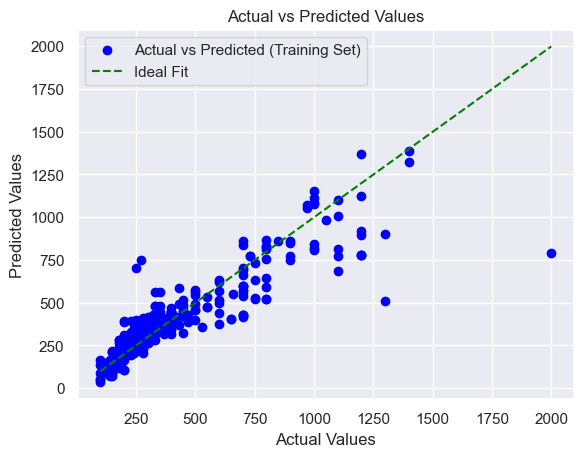

--------------------------------------------


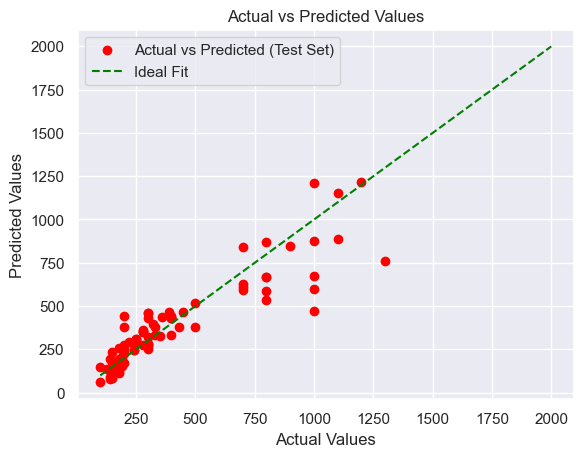

--------------------------------------------
Train Data is : 
 [  1   2   3   4   5   6   7   8   9  12  13  14  15  16  17  18  19  22
  24  25  26  29  30  31  32  33  34  35  36  38  41  42  43  44  45  46
  48  50  51  55  56  57  60  61  62  63  64  65  66  67  68  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  89  91  92
  93  94  95  96  97  98  99 101 102 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 127 128 130 131 134
 135 136 137 138 140 141 142 143 144 145 147 148 149 150 151 153 154 155
 156 158 159 164 165 166 168 169 170 171 172 173 175 176 178 179 180 181
 182 183 184 186 187 188 189 190 191 192 193 194 195 196 197 199 201 202
 205 206 207 209 210 211 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 234 235 236 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 257 258 259 260 263 265 267 268
 269 270 271 273 274 276 277 278 279 280 281 282 283 284 285 

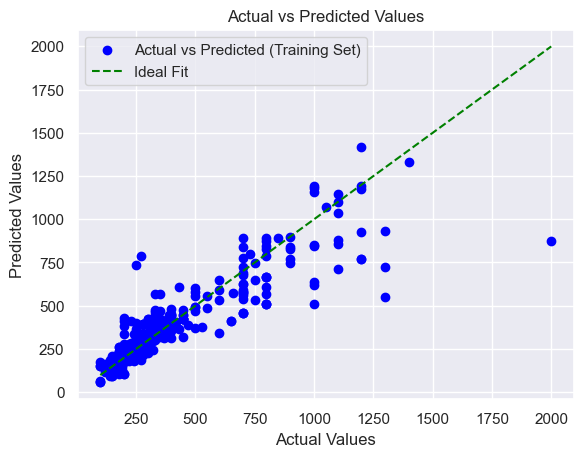

--------------------------------------------


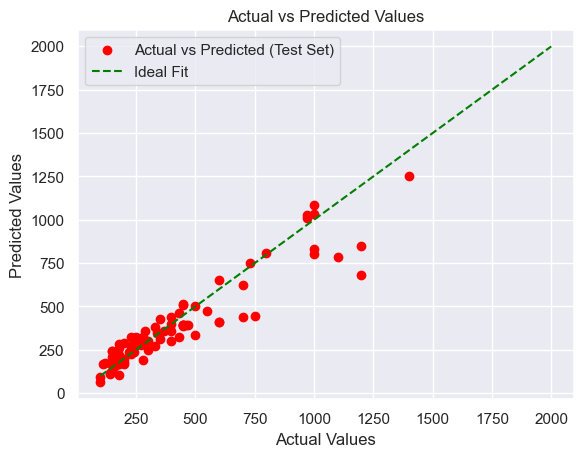

--------------------------------------------
Train Data is : 
 [  0   1   2   3   4   6   7   8   9  10  11  12  13  18  19  20  21  22
  23  25  26  27  28  30  31  32  34  36  37  39  40  42  43  45  47  48
  49  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  71  72  73  74  75  76  77  78  79  80  83  84  85  88  89  90
  91  94  95  96  98  99 100 101 102 103 104 105 106 107 108 109 110 112
 114 115 116 117 118 119 121 123 124 126 128 129 130 131 132 133 134 135
 137 138 139 140 141 142 145 146 147 151 152 153 157 158 159 160 161 162
 163 164 165 166 167 168 169 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 210 211 212 214 216 217 218 219 220 221 222 224 226
 228 230 231 232 233 234 235 236 237 239 240 241 242 243 245 246 247 248
 249 250 251 254 255 256 257 260 261 262 263 264 266 268 269 270 271 272
 273 275 276 277 279 280 281 282 283 284 285 286 287 288 291 

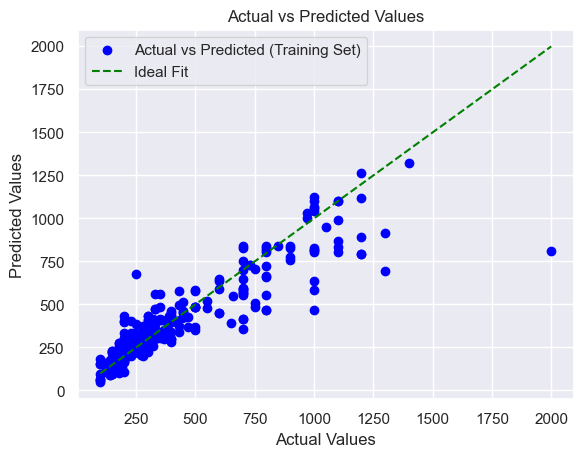

--------------------------------------------


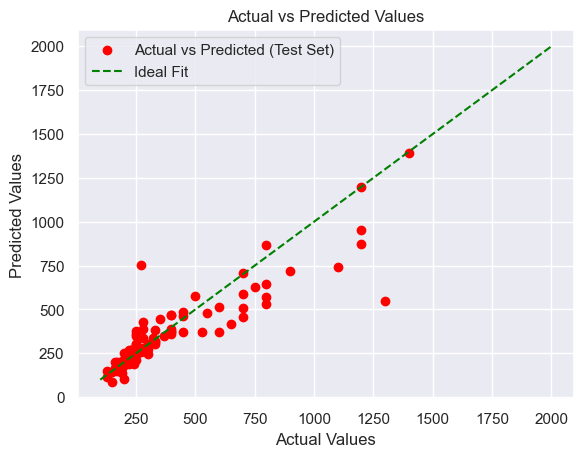

--------------------------------------------
Train Data is : 
 [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  26  27  28  29  30  31  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  62  63  65  66  69  70  71  72  73  77  80  81  82  83  84
  85  86  87  88  90  91  92  93  95  97  98  99 100 102 103 104 106 108
 110 111 112 113 114 117 118 120 122 125 126 127 129 131 132 133 135 136
 137 139 140 141 142 143 144 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 165 166 167 168 169 170 172 173 174 175 177
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 197 198 199
 200 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 219
 220 221 222 223 224 225 226 227 228 229 232 233 235 236 237 238 239 240
 241 243 244 245 246 252 253 254 255 256 258 259 261 262 264 265 266 267
 268 270 272 273 274 275 278 279 280 284 287 288 289 290 291 

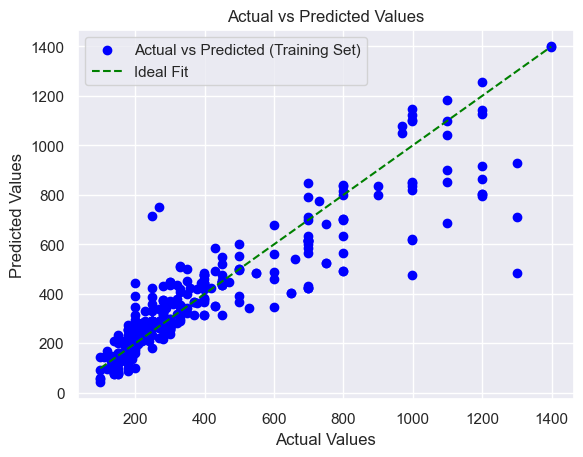

--------------------------------------------


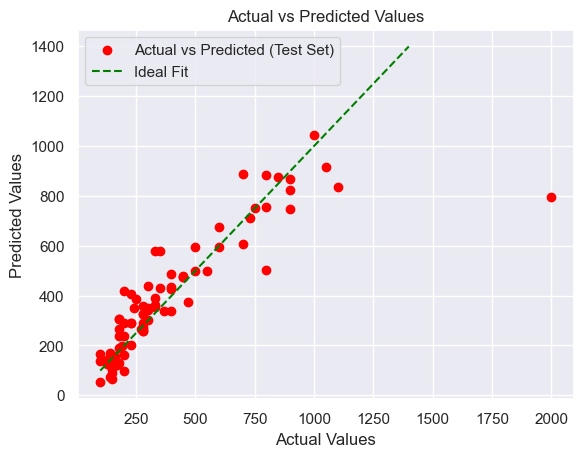

--------------------------------------------
Train Data is : 
 [  0   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20  21
  23  24  25  26  27  28  29  32  33  35  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  56  58  59  61  62  64  65  66
  67  68  69  70  71  74  75  76  77  78  79  81  82  85  86  87  88  89
  90  92  93  94  96  97 100 101 102 103 105 106 107 109 111 112 113 115
 116 118 119 120 121 122 123 124 125 126 127 128 129 130 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 154
 155 156 157 160 161 162 163 164 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 182 183 185 187 188 189 190 191 192 194 195 196 197
 198 200 201 203 204 208 209 212 213 215 217 218 221 222 223 225 227 228
 229 230 231 232 233 234 237 238 240 242 243 244 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 269 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 

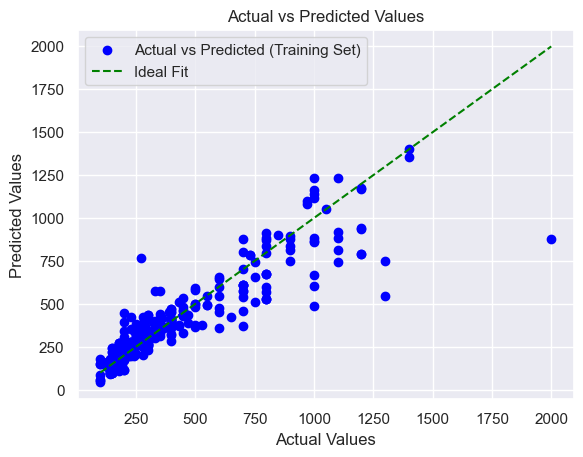

--------------------------------------------


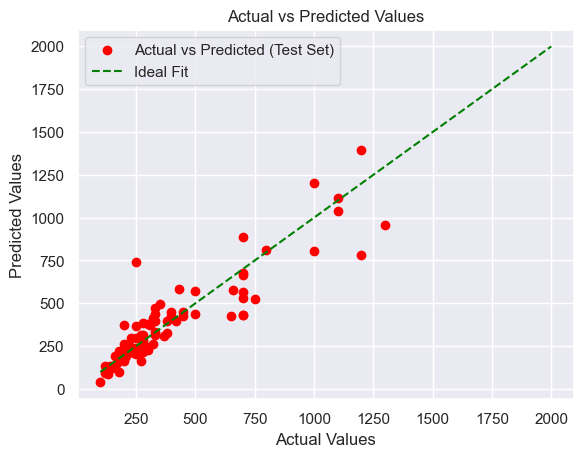

--------------------------------------------


In [30]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR


kf = KFold(n_splits=5, random_state = 40, shuffle = True)
kf.get_n_splits(X)

test_scores = []
test_rmse = []

for train_index, test_index in kf.split(X):
    print("Train Data is : \n", train_index)
    print("Test Data is : \n", test_index)
    print("------------------------------------")
    
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    
    print('X_train Shape is ', X_train.shape)
    print('X_Test Shape is ', X_test.shape)
    
    print('y_train Shape is ', y_train.shape)
    print('y_Test Shape is ', y_test.shape)
    
    print('-------------------------------------------')
    
    
    # PreProcessing ------------------------------------------------
    
    
    
    
    from sklearn.preprocessing import StandardScaler
    standrd = StandardScaler()
    X_train = standrd.fit_transform(X_train)
    X_test  = standrd.fit_transform(X_test)


    
    from sklearn.linear_model import LinearRegression

    svr = SVR(kernel='linear', C=2000, gamma='scale', epsilon=1.0)
    svr.fit(X_train, y_train)
    
    
    
    from sklearn.metrics import mean_squared_error
    
    
    # prediction


    y_pred = svr.predict(X_test)

    rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Training Score: ', svr.score(X_train, y_train))
    print('Testing Score: ', svr.score(X_test, y_test))
    print('RMSE: ',rmse)
    
    
    test_scores.append(svr.score(X_test, y_test))
    test_rmse.append(rmse)
    
    
    plt.scatter(y_train, svr.predict(X_train), color='blue', label='Actual vs Predicted (Training Set)')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='green', label='Ideal Fit')

    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

    
    print('--------------------------------------------')
    
    plt.scatter(y_test, y_pred, color='red', label='Actual vs Predicted (Test Set)')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='green', label='Ideal Fit')

    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

    
    print('--------------------------------------------')
    
    

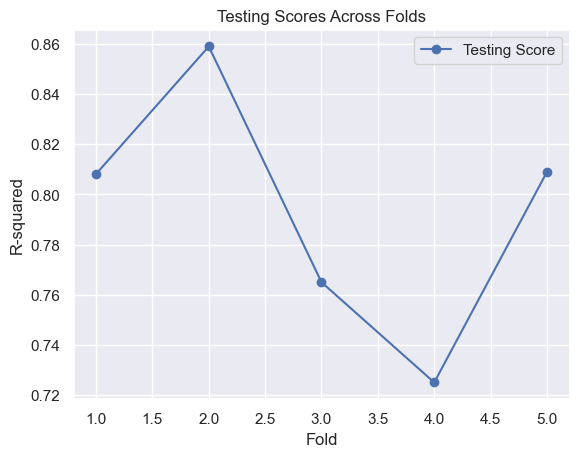

In [31]:
plt.plot(range(1, kf.get_n_splits() + 1), test_scores, marker='o', label='Testing Score')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Testing Scores Across Folds')
plt.legend()
plt.show()

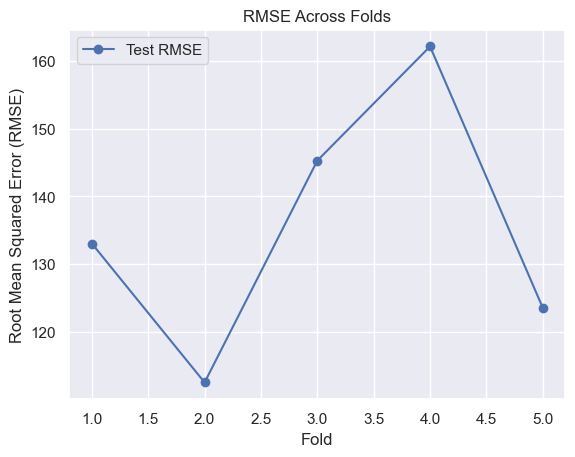

In [32]:
plt.plot(range(1, kf.get_n_splits() + 1), test_rmse, marker='o', label='Test RMSE')
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Across Folds')
plt.legend()
plt.show()

In [33]:
X_test

array([[ 4.68019680e-01, -1.97359541e-01,  2.00943090e+00,
         2.77675298e+00,  1.72921364e+00,  3.47910764e-01,
         2.80904669e+00,  9.04300691e-02,  9.26760356e-01,
         5.39979614e+00],
       [ 1.18329504e+00,  7.81382674e-01, -6.22114828e-03,
         6.14573094e-02,  9.85701201e-01,  5.69294547e-01,
         2.69523845e-01, -1.18850948e-01, -3.90214887e-01,
         3.95408413e-01],
       [-8.83055999e-03,  1.16694779e+00, -6.22114828e-03,
         9.66555865e-01,  2.99382027e-01, -3.43913557e-01,
         3.54174606e-01,  4.04351594e-01,  1.91449179e+00,
         3.95408413e-01],
       [-8.83055999e-03, -1.13161347e+00, -6.22114828e-03,
         9.66555865e-01, -3.86937148e-01, -6.06806799e-01,
         2.69523845e-01, -1.18850948e-01, -3.90214887e-01,
         3.95408413e-01],
       [ 2.29594560e-01,  4.55135269e-01, -6.22114828e-03,
         6.14573094e-02,  1.34157040e-02,  3.47910764e-01,
         2.69523845e-01,  4.27605041e+00, -3.90214887e-01,
        -6.

In [34]:
y_pred = svr.predict(X_test)

In [35]:
y_pred

array([ 780.57298233,  298.79701266,  663.94858453,  396.14706193,
        738.75921114,  423.28929687,  222.59141866,  314.10932355,
        227.31596001,  208.28527578,  954.41570443,  579.77364952,
        288.71723911,  396.14706193,  308.85501881,  563.98637289,
       1202.44147451,  885.87445028,  446.29413779,  314.10932355,
        495.28360909,  533.22789569, 1392.91557051,  432.30146021,
        200.00407086,  425.37557346,  217.44354111,  134.13582106,
        239.60096918,  374.31225804,  207.81207707,  242.12899408,
        161.65352375,  241.15359189,  332.63779571,  189.823643  ,
        134.13582106,  227.88414558,  381.59510978,  261.74078371,
        384.20088693,  217.44354111,  135.37574688,  122.78462984,
         37.68562325,  214.61544755,  257.3512147 ,  323.90242944,
        149.3712917 ,  173.37313735,  100.9628905 ,  134.13582106,
        164.94919213,  227.43924465,  263.86759607,   86.44670328,
       1114.55517857,  571.57442891,  808.07869223,  193.20226

In [36]:
data['Brand']

0       0
1      12
2       9
3      15
4       4
       ..
402    12
403    15
404     0
405    10
406    12
Name: Brand, Length: 407, dtype: int32

In [37]:
import joblib

joblib.dump(svr, 'svr_model_mobile_price.pkl')

['svr_model_mobile_price.pkl']

In [41]:
import tkinter as tk
from tkinter import messagebox
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Function to load the SVR model
def load_model():
    # Load the trained SVR model from a file
    try:
        global svr_model
        svr_model = joblib.load('svr_model_mobile_price.pkl')
        messagebox.showinfo("Model Loaded", "SVR model has been successfully loaded!")
    except:
        messagebox.showerror("Error", "Failed to load the SVR model!")

# Function to predict using the SVR model
def predict():
    try:
        # Get input values from the entry widgets
        
        inputs= [float(entry.get()) for entry in entry_widgets]
        print(inputs)
    

        inputs = np.array(inputs).reshape(-1, 1)
        print(inputs)
        
        from sklearn.preprocessing import StandardScaler
        standrd = StandardScaler()
        inputs = standrd.fit_transform(inputs)
        print(inputs)
        
        inputs = np.array(inputs).reshape(1, -1)
        print(inputs)

        # Make prediction using the SVR model
        prediction = svr_model.predict(inputs)
        
        # Display the prediction
        prediction_label.config(text=f"Predicted Output: {prediction[0]:.2f}")
    except Exception as e:
        messagebox.showerror("Error", f"Prediction failed: {str(e)}")

# Create the main window
root = tk.Tk()
root.title("SVR Model GUI")

# Load the SVR model
load_model()

# Create entry widgets for input values

columns = ['brand', 'model','storage', 'RAM', 'Screen Size', 'Bettery capacity', 'camera1', 'camera2', 'camera3', 'camera4']

input_frames = []
entry_widgets = []



for i in range(10):
    frame = tk.Frame(root)
    frame.pack(pady=5)
    label = tk.Label(frame, text=columns[i])
    label.pack(side=tk.LEFT)
    entry = tk.Entry(frame, width=10)
    entry.pack(side=tk.LEFT)
    input_frames.append(frame)
    entry_widgets.append(entry)

# Button to make prediction
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.pack(pady=10)

# Label to display prediction
prediction_label = tk.Label(root, text="")
prediction_label.pack()

# Run the main event loop
root.mainloop()


[0.0, 232.0, 128.0, 6.0, 6.1, 3095.0, 12.0, 12.0, 12.0, 0.0]
[[   0. ]
 [ 232. ]
 [ 128. ]
 [   6. ]
 [   6.1]
 [3095. ]
 [  12. ]
 [  12. ]
 [  12. ]
 [   0. ]]
[[-0.38170715]
 [-0.12891374]
 [-0.24223492]
 [-0.37516939]
 [-0.37506042]
 [ 2.99068764]
 [-0.36863163]
 [-0.36863163]
 [-0.36863163]
 [-0.38170715]]
[[-0.38170715 -0.12891374 -0.24223492 -0.37516939 -0.37506042  2.99068764
  -0.36863163 -0.36863163 -0.36863163 -0.38170715]]


In [39]:
# entry_model_brand = []


# label_encoder_brand = LabelEncoder()
# label_encoder_model = LabelEncoder()

# label_encoder_brand.fit(dataset['Brand'])
# label_encoder_model.fit(dataset['Model'])




# frame = tk.Frame(root)
# frame.pack(pady=5)
# label1 = tk.Label(frame, text="Brand")
# label1.pack(side=tk.LEFT)
# entry1 = tk.Entry(frame, width=10)
# entry1.pack(side=tk.LEFT)

# input_text1 = entry1.get()

# brand = label_encoder_brand.transform([input_text1])[0]

# input_frames.append(frame)
# entry_model_brand.append(model)





# frame = tk.Frame(root)
# frame.pack(pady=5)
# label2 = tk.Label(frame, text= "Model")
# label2.pack(side=tk.LEFT)
# entry2 = tk.Entry(frame, width=10)
# entry2.pack(side=tk.LEFT)

# input_text2 = entry2.get()

# model = label_encoder_model.transform([input_text2])[0]

# input_frames.append(frame)
# entry_model_brand.append(model)




